<a href="https://colab.research.google.com/github/GeniusGun/python/blob/master/pandas/pandas_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 04-1 데이터 시각화가 필요한 이유

## [1] 앤스콤 4분할 그래프 살펴보기
>데이터 시각화를 보여주는 전형적인 사례로 앤스콤 4분할 그래프(Anscombe's quartet)가 있습니다. 이 그래프는 영국의 프랭크 앤스콤(frank Anscombe)이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프 입니다. 그러면 앤스콤이 지적한 '함정'이란 무엇일까요?
>
> ### 앤스콤이 지적한 함정과 데이터 시각화의 필요성
>앤스콤 4분할 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있으며 모든 데이터 그룹은 x, y열을 가지고 있습니다. 그런데 이 4개의 데이터 그룹은 각각 편균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다는 특징이 있습니다. 그래서 이런 결과만 보고 __'데이터 그룹 1, 2, 3, 4의 데이터는 모두 같을 것이다'__ 라고 착각할 수 있습니다. 바로 이것이 앤스콤이 지적한 '함정'입니다. 하지막 각 데이터 그룹을 시각화하면 데이터그룹이 서로 다른 데이터 패턴을 가지고 있다는 점을 금방 알 수 있습니다. 이런 점에서 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소라고 할 수 있습니다. 그러면 데이터 시각화란 무엇인지 직접 실습하며 알아보겠습니다.

### (1) 앤스콤 데이터 집합 불러온 후 그래프 그리기

#### _1._ 앤스콤 데이터 집합 불러오기
>앤스콤 데이터 집합은 seaborn 라이브러리에 포람되어 있습니다. seaborn 라이브러리의 load_dataset 메서드에 문자열 sndcombe을 전달하면 앤스콤 데이터 집합을 불러올 수 있습니다. 이때 데이터프레임의 열 이름 중 dataset 열이 데이터 그룹을 구분한다는 것을 알 수 있습니다.

In [49]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')
print(anscombe.sample(10).sort_index())
print('-'*30)
print(type(anscombe))
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].mean())
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].max())
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].min())
print('-'*30)
print(anscombe.groupby('dataset')['x', 'y'].median())

   dataset     x      y
1        I   8.0   6.95
7        I   4.0   4.26
9        I   7.0   4.82
11      II  10.0   9.14
15      II  11.0   9.26
22     III  10.0   7.46
36      IV   8.0   8.84
37      IV   8.0   8.47
40      IV  19.0  12.50
43      IV   8.0   6.89
------------------------------
<class 'pandas.core.frame.DataFrame'>
------------------------------
           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
------------------------------
            x      y
dataset             
I        14.0  10.84
II       14.0   9.26
III      14.0  12.74
IV       19.0  12.50
------------------------------
           x     y
dataset           
I        4.0  4.26
II       4.0  3.10
III      4.0  5.39
IV       8.0  5.25
------------------------------
           x     y
dataset           
I        9.0  7.58
II       9.0  8.14
III      9.0  7.11
IV       8.0  7.04


#### _4._ matplotlib 라이브러리로 그래프 그리기
>앤스콤 데이터 집합을 잘 불러왔나요? 데이터 집합이 준비되었으면 이제 그래프로 시각화를 하면 됩니다. 이 책에서는 그래프를 그리기 위해 matplotlib 라이브러리를 사용합니다. 먼저 그래프를 그리기 위해 matplotlib 라이브러리를 불러오겠습니다.

In [0]:
%matplotlib inline      # 책에는 [ %matplotlib notebook ] 이라고 되어있지만 colab의 경우 지금과 같이 사용한다.
import matplotlib.pyplot as plt

### _3._
>다음은 anscombe 데이터프레임의 dataset 열에서 데이터값이 1인것만 추출한 것입니다.

In [51]:
dataset_1 = anscombe[anscombe['dataset']=='I']
print(dataset_1)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68


#### _4._
>선 그래프는 plot 메서드로 그릴 수 있습니다. plot 메서드에 x, y축 데이터를 전달하면 선 그래프가 나타납니다. 앞에서 준비한 dataset_1의 x, y열을 전달하세요.

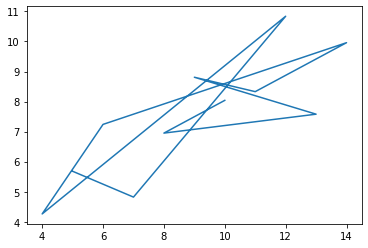

In [52]:
plt.plot(dataset_1['x'], dataset_1['y'])

#### _5._
>plot 메서드는 기본적으로 선으로 그래프를 그립니다. 만약 점으로 그래프를 그리려면 o을 세번째 인자로 전달하면 됩니다.

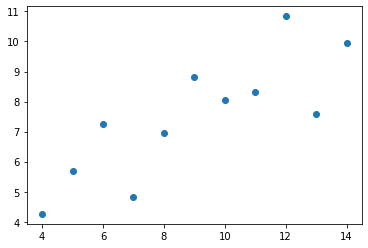

In [53]:
plt.plot(dataset_1['x'], dataset_1['y'],'o')